In [1]:
import numpy as np
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
import math
from collections import Counter




In [2]:
def getEachRowAsSingleString(filename):
    data01 = open(filename, "r")
    lines = data01.read().splitlines()
    return lines

def getEachRowAsSplitList(filename, delim):
    data01 = open(filename, "r")
    lines = data01.read().splitlines()
    ll = []
    for l in lines :
        ll.append(l.split(delim))
    return ll

def most_frequent(List):
    return max(set(List), key = List.count)

def least_frequent(List):
    return min(set(List), key = List.count)

def mergedLists(lists) :
    out = []
    while len(lists)>0:
        first, *rest = lists
        first = set(first)
        lf = -1
        while len(first)>lf:
            lf = len(first)
            rest2 = []
            for r in rest:
                if len(first.intersection(set(r)))>0:
                    first |= set(r)
                else:
                    rest2.append(r)     
            rest = rest2

        out.append(first)
        lists = rest
    return out
        
def demoInput() :
    lines = getEachRowAsSplitList("demoinput.txt", " ")
    multilines = getEachRowAsSingleString("demoinput.txt")
    print("getEachRowAsSplitList", lines)
    print("getEachRowAsSingleString", multilines)

def get8Coordineighbours(x,y) :
    neigh = [(x-1,y-1),(x,y-1),(x+1,y-1),(x-1,y),(x+1,y),(x-1,y+1),(x,y+1),(x+1,y+1)]
    return neigh

def get9Coordineighbours(x,y) :
    neigh = []
    neigh.append((x-1,y-1))
    neigh.append((x,y-1))
    neigh.append((x+1,y-1))
    neigh.append((x-1,y))
    neigh.append((x,y))
    neigh.append((x+1,y))
    neigh.append((x-1,y+1))
    neigh.append((x,y+1))
    neigh.append((x+1,y+1))
    return neigh


def get4Coordineighbours(x,y) :
    neigh = []
    neigh.append((x-1,y))
    neigh.append((x,y-1))
    neigh.append((x,y+1))
    neigh.append((x+1,y))
    return neigh

def getPairs(test_list) :
    res = [(a, b) for idx, a in enumerate(test_list) for b in test_list[idx + 1:]]
    return res


demoInput()

getEachRowAsSplitList [['hej', 'hej'], ['hej', 'nej']]
getEachRowAsSingleString ['hej hej', 'hej nej']


In [5]:
def task01() : 
    print("TASK01")
    lines = getEachRowAsSingleString("01.txt")
    val = 100000000
    increased = 0
    tripInc = 0
    cnt = 0
    for l in lines :
        #B-TASK
        if cnt > 3 :
            firstTrip = int(lines[cnt-4]) + int(lines[cnt-3]) + int(lines[cnt-2])
            secTrip = int(lines[cnt-3]) + int(lines[cnt-2]) + int(lines[cnt-1])
            thirdTrip = int(lines[cnt-2]) + int(lines[cnt-1]) + int(lines[cnt])
            if secTrip > firstTrip :
                tripInc = tripInc + 1
            if cnt == len(lines) - 1 :
                if thirdTrip > secTrip :
                    tripInc = tripInc + 1
        #A-TASK
        if val <=int(l) :
            increased = increased + 1
        val = int(l) 
        cnt = cnt + 1 
    print("1A", increased) 
    print("1B" ,tripInc)

task01()


TASK01
1A 1342
1B 1378


In [6]:
def task02() :
    print("TasK02")
    lines = getEachRowAsSplitList("02.txt", " ")
    f = 0
    d1 = 0 
    d2 = 0 
    a = 0
    hor = 0
    for l in lines :
        if l[0] == "down":
            d1 = d1 + int(l[1])
            a = a + int(l[1])
        elif l[0] == "up":
            d1 = d1 - int(l[1])
            a = a - int(l[1])
        elif l[0] == "forward" :
            f = f + int(l[1])
            hor = hor + int(l[1])
            d2 = d2 + (a*int(l[1]))
        
    print("2A", d1*f)
    print("2B", d2*hor)

task02()

TasK02
2A 1690020
2B 1408487760


In [7]:
def task03() :
    print("TasK03")
    lines = getEachRowAsSingleString("03.txt")
    nums = getFrequency(lines)
    gamma = ""
    epsilon = ""
    for a in nums :
        if (nums[a]) > 500 :
            gamma = gamma + "1"
            epsilon = epsilon + "0"
        else :
            gamma = gamma + "0"
            epsilon = epsilon + "1"
    
    print("03A", int(epsilon,2) * int(gamma,2))

    # oxygen generator rating
    oxygens = lines
    seed = ""
    for a in range(12) :
        if nums[str(a)] >= (len(oxygens) / 2):
            seed = seed + "1"
            oxygens = getFilteredList(oxygens, seed)
        else :
            seed = seed + "0"
            oxygens = getFilteredList(oxygens, seed)
            
        nums = getFrequency(oxygens)
        if len(oxygens) == 1 :
            break


    #FRESH VARIABLES for CO2 scrubber rating
    seed = ""
    nums = getFrequency(lines)
    scrubber = lines   
   
    for a in range(12) :
        if nums[str(a)] >= len(scrubber) / 2:
            seed = seed + "0"
            scrubber = getFilteredList(scrubber, seed)
        else :
            seed = seed + "1"
            scrubber = getFilteredList(scrubber, seed)
            
        nums = getFrequency(scrubber)
        if len(scrubber) == 1 :
            break

    print("03b", int(oxygens[0],2) * int(scrubber[0],2))


def getFrequency(lines) :
    nums = getCleanDict()
    for li in lines :
        index = 0
        for l in li :
            nums[str(index)] =  nums[str(index)] + int(l)
            index = index + 1
    return nums

def getFilteredList(liii, seed) :
    newList = []
    for l  in liii  :
        if str(l).startswith(seed) :
            newList.append(l)
    return newList

def getCleanDict() :
    return {'0' : 0, '1' : 0, '2' : 0, '3' : 0,
            '4' : 0, '5' : 0, '6' : 0, '7' : 0, 
            '8' : 0, '9' : 0, '10' : 0, '11' : 0}

task03()

TasK03
03A 852500
03b 1007985


In [8]:
def task04() : 
    #Where did it go I sup it away??
    print('NYI')
    print("TasK04")


In [9]:
def task05() :
    print("TasK05")

    lines = getEachRowAsSplitList("05.txt", ",")
    dim = 1000
    board = np.zeros((dim,dim))
    for l in lines :
        x1 = int(l[0])
        y1 = int(l[1])
        x2 = int(l[2])
        y2 = int(l[3])
        
        if x1 == x2 :
            i = y2
            if y2 >= y1 :
                while i >= y1 :
                    board[x1][i] = board[x1][i] + 1
                    i = i - 1
            else :
                while i <=  y1 :
                    board[x1][i] = board[x1][i] + 1
                    i = i + 1
        elif y1 == y2 :
            i = x2
            if x2 >= x1 :
                while i  >= x1 :
                    board[i][y1] = board[i][y1] + 1
                    i = i - 1
            else :
                while i <= x1 :
                    board[i][y1] = board[i][y1] + 1
                    i = i + 1

        ## PART OF B - DIAGONALS CHECKER.
        else :
            i = x2
            j = y2                
            if x1 > x2 : 
                if y1 > y2 :
                    while i <= x1 :
                        board[i][j] = board[i][j] + 1
                        i = i + 1
                        j = j + 1
                else :
                    while i <= x1 :
                        board[i][j] = board[i][j] + 1
                        i = i + 1
                        j = j - 1
            elif y1 > y2 : 
                while j <= y1 :
                    board[i][j] = board[i][j] + 1
                    i = i - 1
                    j = j + 1
            else :
                while j >= y1 :
                    board[i][j] = board[i][j] + 1
                    i = i - 1
                    j = j - 1
    counter = 0
    for i in range(dim) :
        for j in range(dim) :
            if board[i][j] > 1 :
                counter = counter +1 

    print(board)                
    print("05b", counter)
task05()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
05b 22213


In [10]:
def task06() :
    fish = [5,4,3,5,1,1,2,1,2,1,3,2,3,4,5,1,2,4,3,2,5,1,4,2,1,1,2,5,4,4,4,1,5,4,5,2,1,2,5,5,4,1,3,1,4,2,4,2,5,1,3,5,3,2,3,1,1,4,5,2,4,3,1,5,5,1,3,1,3,2,2,4,1,3,4,3,3,4,1,3,4,3,4,5,2,1,1,1,4,5,5,1,1,3,2,4,1,2,2,2,4,1,2,5,5,1,4,5,2,4,2,1,5,4,1,3,4,1,2,3,1,5,1,3,4,5,4,1,4,3,3,3,5,5,1,1,5,1,5,5,1,5,2,1,5,1,2,3,5,5,1,3,3,1,5,3,4,3,4,3,2,5,2,1,2,5,1,1,1,1,5,1,1,4,3,3,5,1,1,1,4,4,1,3,3,5,5,4,3,2,1,2,2,3,4,1,5,4,3,1,1,5,1,4,2,3,2,2,3,4,1,3,4,1,4,3,4,3,1,3,3,1,1,4,1,1,1,4,5,3,1,1,2,5,2,5,1,5,3,3,1,3,5,5,1,5,4,3,1,5,1,1,5,5,1,1,2,5,5,5,1,1,3,2,2,3,4,5,5,2,5,4,2,1,5,1,4,4,5,4,4,1,2,1,1,2,3,5,5,1,3,1,4,2,3,3,1,4,1,1]
    #fish = [3,4,3,1,2]
    print("TasK06")

    for day in range(80) :
        newSpawn = []
        counter = 0

        for a in fish :
            if( a == 0 ) :
                fish[counter] = 6
                newSpawn.append(8)
            else :
                fish[counter] = fish[counter] - 1 
            counter = counter + 1
        fish.extend(newSpawn)
    print("06a",day+1,len(fish))
    
    tot = 0
    for a in fish :
            if( a == 1 ) :
                tot = tot + 6206821033
            elif (a == 2) :
                tot = tot + 5617089148
            elif (a == 3) :
                tot = tot + 5217223242
            elif (a == 4) :
                tot = tot + 4726100874
            elif (a == 5) :
                tot = tot + 4368232009
    print("06b", tot )
task06()

06a 80 350917
06b 1098892254449521


In [15]:
def task07() :
    lines = getEachRowAsSplitList("07.txt", ",")
    print("TasK07")

    horz = []
    for ll in lines :
        for l in ll :
            horz.append(int(l))

    start = min(horz)
    stop = max(horz)
    minMove = 10000000000000
    best = 0

    while start < stop :
        sum = 0
        for h in horz :
            smaller = True
            for step in range(abs(h-start)) :
                sum = sum + step + 1
            if sum > minMove :
                smaller = False
                break
        if smaller :
            minMove = sum
            best = start
        
        start = start + 1
    print(best,minMove)
  
task07()

TasK07
5 168


In [56]:
def task08() :
    print("TasK08")
    lines = getEachRowAsSplitList("08.txt", " ")
    sum = 0
    counter = 0 
    for ll in lines :
        myVals = False 
        val = []
        oneChars = []
        occurances = ""
        #Segment B, F and E are lite a unique amount of times for 0+9 so just
        #count the occurance if one letter is the same as those assign that letter 
        #to the segment
        segmentB = ""
        segmentF = ""
        segmentE = ""

        for l in ll :
            if not myVals :
                occurances = occurances + l
                if len(l) == 2 :
                    oneChars = l
                if l == "|" :
                    myVals = True
                    a = occurances.count("a")
                    b = occurances.count("b")
                    c = occurances.count("c")
                    d = occurances.count("d")
                    e = occurances.count("e")
                    f = occurances.count("f")
                    g = occurances.count("g")
                    if a == 4 :
                        segmentE = "a"
                    elif a == 6 :
                        segmentB = "a"
                    elif a == 9 :
                        segmentF = "a"
                    
                    if b == 4 :
                        segmentE = "b"
                    elif b == 6 :
                        segmentB = "b"
                    elif b == 9 :
                        segmentF = "b"
                    
                    if c == 4 :
                        segmentE = "c"
                    elif c == 6 :
                        segmentB = "c"
                    elif c == 9 :
                        segmentF = "c"
                    
                    if d == 4 :
                        segmentE = "d"
                    elif d == 6 :
                        segmentB = "d"
                    elif d == 9 :
                        segmentF = "d"
                    
                    if e == 4 :
                        segmentE = "e"
                    elif e == 6 :
                        segmentB = "e"
                    elif e == 9 :
                        segmentF = "e"
                    
                    if f == 4 :
                        segmentE = "f"
                    elif f == 6 :
                        segmentB = "f"
                    elif f == 9 :
                        segmentF = "f"
                    
                    if g == 4 :
                        segmentE = "g"
                    elif g == 6 :
                        segmentB = "g"
                    elif g == 9 :
                        segmentF = "g"
            elif myVals:
            
                if len(l) == 2 :
                    counter = counter + 1
                    val.append(1)
                elif len(l) == 3 :
                    counter = counter + 1
                    val.append(7)
                elif len(l) == 4 :
                    counter = counter + 1
                    val.append(4)
                elif len(l) == 7 :
                    counter = counter + 1
                    val.append(8)
                elif len(l) == 5 :
                    #2,3,5
                    if l.count(segmentF) == 0 :
                        val.append(2)
                    elif l.count(segmentB) == 0 :
                        val.append(3)
                    else :
                        val.append(5)
                elif len(l) == 6 :
                    #6,9,0
                    if l.count(segmentE) == 0 :
                        val.append(9)
                    elif l.count(oneChars[0]) == 1 and l.count(oneChars[1]) == 1 :
                        val.append(0)
                    else :
                        val.append(6)  
                    
                  
            
        sum = sum +val[0]*1000 + val[1]*100 + val[2]*10 + val[3]*1 
    print("08a", counter)
    print("08b", sum)
task08()

TasK08
08a 264
08b 1063760


In [101]:
def task09() :
    print("TasK09")
    counterX = 0 
    lines = getEachRowAsSingleString("09.txt") 
    dimX = 100    
    dimY = 100
    map = np.zeros((dimX,dimY))
    basins = []

    for ll in lines :
        counterY = 0
        for l in ll :
            map[counterX,counterY] = int(l) + 1 
            counterY = counterY + 1 
            if int(l) != 9 :
                basins = inBasin(counterX,counterY, basins)
        counterX = counterX + 1 
        
    #09A
    valleySum = 0
    for x in range(dimX) :
        for y in range(dimY) :
            neigh = get4Coordineighbours(x,y)
            valley = True
            while len(neigh) != 0 :
                i,j = neigh.pop()
                if i > -1 and i < dimX and j > -1 and j < dimY :
                    if map[x,y] >= map[i,j] :
                        valley = False
                        break
            if valley :
                valleySum = valleySum + map[x,y]

    print('09A', valleySum)
    
    #09B
    basse = mergedLists(basins)
    lengths = []
    for b in basse :
        lengths.append(len(b))
    
    print("09B",sorted(lengths, reverse=True)[0]*sorted(lengths, reverse=True)[1]*sorted(lengths, reverse=True)[2])
    
def inBasin(x,y, basse):
    newBasin = [(x,y)]
    inBasse = False
    for b in basse :
        if (x-1,y) in b :
            b.extend(newBasin)         
            inBasse = True
        elif (x,y-1) in b :
            b.extend(newBasin)
            inBasse = True
        elif (x,y+1) in b :
            b.extend(newBasin)
            inBasse = True
        elif (x+1,y) in b :
            b.extend(newBasin)
            inBasse = True
    if not inBasse :
        basse.append(newBasin)
    return basse

task09()

TasK09
09A 436.0
09B 1317792


In [41]:
def task10() :

    print("TasK10")
    lines = getEachRowAsSingleString("10.txt") 
    corrl = 0
    totClosers = []
    for ll in lines :
        expectedCloser = []
        broke = False
        closers = 0
        for l in ll : 
            if l == '(' :
                expectedCloser.append(')')
            elif l  == '[' :
                expectedCloser.append(']')
            elif l  == '{' :
                expectedCloser.append('}')
            elif l  == '<' :
                expectedCloser.append('>')
            elif l == ')' :
                if l != expectedCloser.pop() :
                    corrl = corrl + 3
                    broke = True
                    break
            elif l  == ']' :
                if l != expectedCloser.pop() :
                    corrl = corrl + 57
                    broke = True
                    break
            elif l  == '}' :
                if l != expectedCloser.pop() :
                    corrl = corrl + 1197
                    broke = True
                    break
            elif l  == '>' :
                if l != expectedCloser.pop() :
                    corrl = corrl + 25137
                    broke = True
                    break
        if not broke:
            for e in expectedCloser[::-1] :
                if e == ")" :
                    closers = (closers*5) + 1
                elif e == "]" :
                    closers = (closers*5) + 2
                elif e == "}" :
                    closers = (closers*5) + 3
                elif e == ">" :
                    closers = (closers*5) + 4
        
            totClosers.append(closers)

    print('10A', corrl)
    totClosers.sort()
    mid = (len(totClosers) ) / 2
   
    print('10B', totClosers[int(mid)] )





task10()

TasK10
10A 436497
10B 2377613374


In [171]:
def task11() : 
    lines = getEachRowAsSingleString("11.txt") 
    dim = 10 
    map = np.zeros((dim,dim))
    
    x = 0
    for ll in lines :
        y = 0 
        for l in ll : 
            map[x,y] = int(l)
            y = y +1     
        x = x + 1
        
    flash = 0 

    for n in range(2000) :
        increaseUs = []
        for x in range(dim) :
            for y in range(dim) : 
                map[x,y] = map[x,y] + 1
                if map[x,y] > 9 :
                    increaseUs.extend(get8Coordineighbours(x,y))                       
                    map[x,y] = 0
                    flash = flash + 1 

        while len(increaseUs) != 0 :
            x,y = increaseUs.pop()
            if x>= 0 and x < dim and y>= 0 and y < dim:
                if map[x,y] != 0 :
                    map[x,y] = map[x,y] + 1 
                    if map[x,y] > 9 :
                        increaseUs.extend(get8Coordineighbours(x,y))                       
                        map[x,y] = 0
                        flash = flash + 1 

        #check if all flash 

        if np.count_nonzero(map) == 0 :
            print("11B", n+1, "All Flash")
            print(map)
            break
        
        if n == 100 :
            print("11A", flash)
            print(map)


task11()

11A 1694
[[1. 1. 7. 7. 3. 0. 6. 0. 0. 0.]
 [1. 5. 3. 2. 3. 5. 0. 0. 0. 0.]
 [3. 3. 2. 2. 2. 5. 0. 0. 8. 0.]
 [2. 2. 2. 2. 2. 5. 0. 0. 7. 0.]
 [2. 2. 2. 2. 2. 4. 0. 0. 6. 0.]
 [2. 2. 2. 2. 2. 7. 7. 3. 5. 0.]
 [2. 2. 2. 2. 6. 4. 4. 7. 4. 0.]
 [2. 2. 2. 7. 4. 3. 4. 7. 5. 0.]
 [9. 2. 2. 7. 6. 6. 7. 4. 0. 0.]
 [7. 9. 6. 2. 2. 2. 4. 0. 0. 0.]]
11B 351 All Flash
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [172]:
def task12() : 
    lines = getEachRowAsSplitList("12.txt", "-")
    graph = {}

    for ll in lines : 
        if ll[0] in graph : 
            graph[ll[0]].append(ll[1])
        else : 
            graph[ll[0]] = [ll[1]]

        if ll[1] in graph : 
            graph[ll[1]].append(ll[0])
        else : 
            graph[ll[1]] = [ll[0]]

    a = depthFirst12A(graph, "start", [], [])
    print("12A", len(a))
   
    paths = []

    for a in graph : 
        if a.islower() :
            if a != "start" and a != "end" :
                res =  depthFirst12B(graph, "start", [], [], a, 2)
                for r in res : 
                    if r not in paths :
                        paths.append(r)
    print("12B", len(paths))

def depthFirst12A(graph, currentVertex, visited, res):
    visitedList = [[]]

    visited.append(currentVertex)
    for vertex in graph[currentVertex]:
        if vertex not in visited or vertex.isupper() :
            depthFirst(graph, vertex, visited.copy(),res)
    visitedList.append(visited)
    if visitedList[1][len(visitedList[1])-1] == "end" :
        res.append(visitedList[1])
    return res


def depthFirst12B(graph, currentVertex, visited, res, allowed, visits):
    visitedList = [[]]

    visited.append(currentVertex)
    for vertex in graph[currentVertex]:
        if vertex not in visited or vertex.isupper() or vertex == allowed:
            if vertex == allowed : 
                if visits != 0 :
                    depthFirst12B(graph, vertex, visited.copy(), res, allowed, visits-1)
            else : 
                depthFirst12B(graph, vertex, visited.copy(), res, allowed, visits)
    visitedList.append(visited)
    if visitedList[1][len(visitedList[1])-1] == "end" :
        res.append(visitedList[1])
    return res

task12()

12A 3495
12B 94849


13A 735


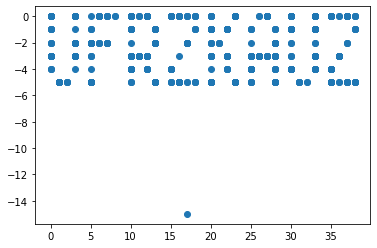

In [176]:
def task13() :
    lines = getEachRowAsSplitList("13.txt", ",")
    folds = [('x', 655), ('y', 447), ('x', 327), ('y', 223), ('x', 163), ('y', 111),
            ('x', 81), ('y', 55), ('x', 40), ('y', 27), ('y', 13), ('y', 6)]
    
    coords = []
    for ll in lines :
        coords.append((int(ll[0]), int(ll[1])))
   
    for f in folds :
        newPaper = []
        for c in coords : 
            if f[0] == 'y' :
                folddiff = c[1] - f[1]
                if folddiff > 0 :
                    c = (c[0],c[1] - folddiff - folddiff)
                newPaper.append(c)
            elif f[0] == 'x' :
                folddiff = c[0] - f[1]
                if folddiff > 0 :
                    c = (c[0] - folddiff - folddiff, c[1])
                newPaper.append(c)
        
        coords = newPaper

        if f == ('x', 655):
            uniq = set(coords)
            print("13A",len(uniq))

    plotPaper(coords)



def plotPaper(coords) : 
    newPlot = [(17,-15)]
    for c in coords :
        newPlot.append((c[0],c[1]*-1))
    a,b = zip(*newPlot)
    plt.scatter(a,b)
    
 
task13()

In [4]:
def task14() :
    input1 = 'NNSOFOCNHBVVNOBSBHCB'
    orig = 'NNSOFOCNHBVVNOBSBHCB'
    lines = getEachRowAsSplitList('14.txt', ' -> ')
    replaceDict = {}
    letterCounter = {}

    for ll in lines :
        replaceDict[ll[0]] =  ll[1]
 
    pairs = {} 
    for i in range(len(orig)) :
        if i+1 < len(orig) :
            pair = orig[i:i+2]
            if pair in pairs :
                pairs[pair] = pairs[pair] + 1
            else :
                pairs[pair] = 1

        if orig[i] in letterCounter :
            letterCounter[orig[i]] = letterCounter[orig[i]] + 1
        else :
            letterCounter[orig[i]] = 1

    for i in range(40) :
        newPairs = {}
        for r in replaceDict : 
           
            if r in pairs :
                fst = r[0] + replaceDict[r]
                snd = replaceDict[r] + r[1]
                if fst in newPairs :
                    newPairs[fst] =  newPairs[fst] +  pairs[r]
                    
                else :
                    newPairs[fst] = pairs[r]

                if snd in newPairs :
                    newPairs[snd] =  newPairs[snd] +  pairs[r]
                else :
                    newPairs[snd] = pairs[r]

                
                if replaceDict[r] in letterCounter :
                    letterCounter[replaceDict[r]] = letterCounter[replaceDict[r]] +  (pairs[r])
                else :
                    letterCounter[replaceDict[r]] = pairs[r]
        
        pairs = newPairs
        if i == 9 :
            print('14B',max(letterCounter.values())  - min(letterCounter.values()))
    
    print('14B',max(letterCounter.values())  - min(letterCounter.values()))
task14()

14B 3906
14B 4441317262452


In [9]:
def task15() :
    lines = getEachRowAsSingleString("15.txt") 
    dim = 100 
    goal1A = '99,99'
    goal1B = '499,499'
    myDict = {}
    graph = {}
    sizer = 5
    counterY = 0

    for a in range(sizer) :
        for b in range(sizer) :
            counterY = b*dim 
            for ll in lines :
                counterX = (a*dim) + 0
                for l in ll : 
                    if counterX == 0 and counterY == 0 :
                        graph['0,0'] = 0
                    else :
                        key = (str(counterX) + ',' + str(counterY)).replace(' ', '')
                        val = (int(l) + b + a) % 9
                        if val == 0 :
                            val = 9
                        graph[key] = val
                    counterX = counterX +1 
                counterY = counterY +1 

    for i in range(dim*sizer) :
        for j in range(dim*sizer) :
            key = (str(i) + ',' + str(j)).replace(' ', '')
            neigh = get4Coordineighbours(i,j) 
            for n in neigh :
                nkey = str(n[0]) + ',' + str(n[1]).replace(' ', '')
                if n[0] > -1 and n[1] > -1 and n[0] < dim*sizer and n[1] < dim*sizer : 
                    if key in myDict :
                        myDict[key].update({nkey : graph[nkey]})
                    else :
                        myDict[key] = {nkey : graph[nkey]}
    path = {}
    for node in graph:
        path[node] = float("inf")
    path['0,0'] = 0
    parents = {}

    #result = search('0,0', '99,99', myDict, path, parents)
    #res = backpedal('0,0', '99,99', result)
    #tot = 0 
    #for r in res : 
    #    tot = tot + graph[r]
    #print('15A', tot)

    result = search('0,0', '499,499', myDict, path, parents)
    res = backpedal('0,0', '499,499', result)
    tot = 0 
    for r in res : 
        tot = tot + graph[r]
    print('15B', tot)

def search(source, target, graph, costs, parents):
    nextNode = source
    while nextNode != target:
        for neighbor in graph[nextNode]:
            if graph[nextNode][neighbor] + costs[nextNode] < costs[neighbor]:
                costs[neighbor] = graph[nextNode][neighbor] + costs[nextNode]
                parents[neighbor] = nextNode
            del graph[neighbor][nextNode]
        del costs[nextNode]
        nextNode = min(costs, key=costs.get)
    return parents


def backpedal(source, target, searchResult):
    node = target
    backpath = [target]
    path = []
    while node != source:
        backpath.append(searchResult[node])
        node = searchResult[node]
    for i in range(len(backpath)):
        path.append(backpath[-i - 1])
    return path



task15()

In [101]:
def task16() :
    lines = getEachRowAsSingleString("16.txt") 
    counter = 0
    a = hex_to_binary(lines[0])

    masterVerions = []
    newcount,versions,values = parse(a, counter)
    masterVerions.extend(versions)

    print('16A', sum(masterVerions))
    print("16B", values[0])


def parse(prgrm, counter) :
    versions = []
    values = []
    packet_version = prgrm[counter:counter+3]
    packet_type_id = prgrm[counter+3:counter+6]
    type_id = int(packet_type_id, 2)
    version = int(packet_version, 2)
    versions.append(version)
    counter = counter + 6 
    if type_id == 4 : 
        literal, count = getLiteral(prgrm[counter:])
        counter = counter + count
        values.append(literal)
        return counter, versions, values
    else : 
        subvals = []

        if prgrm[counter] == '0':
            counter = counter + 1 
            lengg = prgrm[counter:counter+15]
            packLeng = int(lengg,2)
            counter = counter + 15  
            while packLeng > 10 :
                newcounter,v, vals = parse(prgrm, counter)
                versions.extend(v)

                subvals.extend(vals)
                diff = newcounter - counter
                counter = newcounter
                packLeng = packLeng - diff
            
        elif prgrm[counter] == '1' :
            counter = counter + 1 
            
            subbers = prgrm[counter:counter+11]
            counter = counter + 11
            numpack = int(subbers,2)
            for i in range(numpack) :
                newCounter,v, vals = parse(prgrm, counter)
                counter = newCounter
                versions.extend(v)
                subvals.extend(vals)


        packval = 0 
        if type_id == 0 : 
            packval = sum(subvals)
        elif type_id == 1 :
            pval = 1
            for a in subvals :
                pval = pval * a
            packval = pval
        elif type_id == 2 : 
            packval = min(subvals)
        elif type_id == 3 : 
            packval = max(subvals)
        elif type_id == 6 :
            if subvals[1] > subvals[0]:
                packval = 1
            else : 
                packval = 0 
        elif type_id == 5 : 
            if subvals[0] > subvals[1] :
                packval = 1
            else : 
                packval = 0 
        elif type_id == 7 : 
            if len(set(subvals)) == 1:
                packval = 1
            else :
                packval = 0 
        values.append(packval)
        return counter, versions, values

def getLiteral(a) :
    #print(a)
    val = ''
    i = 0
    while True :
        if a[i*(5)] == '0' :
            val = val + a[(i*5)+1 : (i+1)*(5) ]
            break
        val = val + a[(i*5)+1 : (i+1)*(5) ]
        i = i+1
    decVak = int(val,2)

    return decVak, (i+1)*5

def hex_to_binary(hstr) :
    res = ''
    for a in hstr :
        if a == '0' :
            res = res + '0000'    
        elif a == '1' :
            res = res + '0001'
        elif a == '2' :
            res = res + '0010'
        elif a == '3' :
            res = res + '0011'
        elif a == '4' :
            res = res + '0100'
        elif a == '5' :
            res = res + '0101'
        elif a == '6' :
            res = res + '0110'
        elif a == '7' :
            res = res + '0111'
        elif a == '8' :
            res = res + '1000'
        elif a == '9' :
            res = res + '1001'
        elif a == 'A' :
            res = res + '1010'
        elif a == 'B' :
            res = res + '1011'
        elif a == 'C' :
            res = res + '1100'
        elif a == 'D' :
            res = res + '1101'
        elif a == 'E' :
            res = res + '1110'
        elif a == 'F' :
            res = res + '1111'
    return res    



task16()

16A 908
16B 10626195124371


In [103]:
def task17():

    target = [240,292,-90,-57]
    targetPositions = [] 
    for x in range(240,292) :
        for y in range(-90,-57) :
            targetPositions.append((x,y))

    ys = []
    paths = []

    for x in range(300) : 
        for y in range(-200,200) :
            res, path = fly((0,0),x,y,target)
            if res != 0 :
                ys.append(res)
                paths.append(path)
    print("17A", max(ys))
    print("17B", len(ys))
    plotPaths(paths, targetPositions)

def fly(myPos, velx, vely, target) : 
    x = velx
    y = vely
    maxY = 0 
    res = 0 
    success = []
    while True :
        myPos = (myPos[0]+velx,myPos[1]+vely)
        success.append(myPos)
        if velx > 0 :
            velx = velx - 1
        elif velx < 0 :
            velx = velx + 1
        
        vely = vely - 1

        if velx == 0 :
            if not inXTarget(myPos, target) :
                #Will never reach target
                break
        
        if myPos[1] > maxY or maxY == 0 :
            maxY = myPos[1]

        if outOfYTarget(myPos, target) :
            #Below y will never reach
            break

        if inTarget(myPos, target) :
            res = maxY
            break
    return res, success

def inTarget(pos, t) :
    if t[0] <= pos[0] and pos[0] <= t[1] :
        if t[2] <= pos[1] and pos[1] <= t[3] :
            return True 
    return False

def inXTarget(pos, t) :
    if t[0] <= pos[0] and pos[0] <= t[1] :
        return True 
    return False

def outOfYTarget(pos, t) :
    if pos[1] < t[2] :
        return True 
    return False

def plotPaths(paths, target) : 
    a,b = zip(*target)
    plt.scatter(a,b,c='red')
    for p in paths : 
        x,y = zip(*p)
        plt.scatter(x,y)

    


task17()

17A 4005
17B 2953


In [295]:
def task18(): 
    lines = getEachRowAsSingleString("18.txt") 
    listOfSnails = []
    later = []
    for ll in lines :
        snail = []
        tail = []
        for l in ll : 
            if l.isnumeric() :
                snail.append(int(l))
                tail.append(int(l))
            elif l == '[' :
                snail.append(-1)
                tail.append(-1)
                
            elif l == ']' :
                snail.append(-2)
                tail.append(-2) 
            elif l == ',' :
                snail.append(-3) 
                tail.append(-3)
    
        listOfSnails.append(snail)
        later.append(tail)

    snail = calcSnail(listOfSnails)

    s = calcMagnitude(snail)
    print('18A', sum(s))
 
    pairs = getPairs(later) 
    revPairs = getPairs(later[::-1])
    pairVals = []
 
    for p in pairs :
        n1 = calcSnail(p)
        pairVals.append(calcMagnitude(n1)[0])
   
    for p in revPairs :
        n1 = calcSnail(p)
        pairVals.append(calcMagnitude(n1)[0])
        

    print('18B', max(pairVals))


def calcSnail(listOfSnails) :
    snail = []
    orig = ""
    ind = 0
    for l in listOfSnails :
        if ind == 0 :
            #INIT
            snail = l
        else :
            #ADD
            snail.insert(0,-1)
            snail.append(-3)
            snail.extend(l)
            snail.append(-2)
        while snail != orig :
            #explode
            while orig != snail :
                orig = snail.copy()
                snail = reduce(snail)
            splitIndex = 0
            #split
            for l in snail :
                if l > 9 :
                    snail = split(snail, splitIndex)
                    break
                splitIndex = splitIndex + 1
        ind = ind + 1

    return snail


def calcMagnitude(snail) :
    index = 0
    for l in snail : 
        if l == -1 :
            if len(snail) > index + 4 :
                if snail[index+1] > -1 :
                    if snail[index+2] == -3 :
                        if snail[index+3] > -1 :
                            if snail[index+4] == -2 :
                                val = (snail[index+1]*3) + (snail[index+3]*2)
                                s = snail[:index]
                                s.insert(index, val)
                                s.extend(snail[index+5:])
                                snail = calcMagnitude(s)
    
    
        index = index + 1
    return snail

    
def split(snail, index) :
    left = int(snail[index] / 2)
    right = int(snail[index] / 2)
    if right + left != snail[index] :
        right = right + 1
    replaceArr = [-1,left,-3,right,-2]

    snail.pop(index)
    for i in range(len(replaceArr)) :
        snail.insert(index+i,replaceArr[i])

    
    return snail


def reduce(snail) :
    res = snail.copy()
    openCount = 0 
    index = 0
    for l in res : 
        if l == -1 :
            openCount = openCount + 1 
        elif l == -2 :
            openCount = openCount - 1
        if openCount > 4 and l > - 1:
            prev, next, nextnext = findNextNextPrev(res,index)
            if prev != -1 :
                res[prev] = res[prev] + res[index]
            if nextnext != -1 :
                res[nextnext] = res[nextnext] + res[next]
            #remove oldparentesis
            s = res[:index-1]
            s.insert(index, 0)
            s.extend(res[index+4:])
            res = s
            break
        #print(index, openCount)
        index = index + 1
    return res


def findNextNextPrev(list, i) :
    prev = -1 
    next = -1 
    nn = -1
    for n in range(len(list)) : 
        if n < i :
            if list[n] > -1 :
                prev = n
        elif n > i :
            if list[n] > -1 :
                if next > - 1 :
                    nn = n
                    break
                else : 
                    next = n

    return prev,next,nn


def printSnail(snailList) :
    text = ''
    for l in snailList : 
        if l == -1 :
            text = text + '['
        elif l == -2 :
            text = text + ']'
        elif l == -3 :
            text = text + ','
        else :
            text = text + str(l)
    print(text)
            

task18()

###REFACTOR 

18A 3725
18B 4832


In [293]:
def task19(): 
    lines = getEachRowAsSplitList("19.txt", ",")
    scanners = {}
    temp = []
    name = ""
    distList = {}
    scannerFriends = {}
    aligned = {}
    shifted = {}
    scannerPos = []
    scannerPos.append((0,0,0))
    for ll in lines :
        if ll[0] == "" :
            scanners[name] = temp
            pairs = getPairs(temp)
            dists = []
            temp = []
            for p in pairs : 
                dist = distance(p[0], p[1])
                if dist in distList : 
                    distList[dist].update({name: [p[0], p[1]]})
                else : 
                    distList[dist] = {name: [p[0], p[1]]}
            dists.sort()
        elif len(ll) == 1 :
            name = ll[0]        
            aligned[name] = False
            shifted[name] = False
        else :
            temp.append((int(ll[0]),int(ll[1]),int(ll[2])))
    
    aligned['--- scanner 0 ---'] = True
    shifted['--- scanner 0 ---'] = True
    #print(len(distList))
    for dd in distList :
        for d in distList[dd] :
            for z in distList[dd] :
                if z != d :
                    try :
                        if z in scannerFriends[d] :
                            scannerFriends[d][z] = scannerFriends[d][z] + 1 
                        else :
                            scannerFriends[d][z] = 1
                    except :
                        scannerFriends[d] = {}
                        scannerFriends[d][z] = 1
    
    while list(aligned.values()).count(False) != 0:
        for a in aligned :
            if not aligned[a] :
                for a2 in aligned : 
                    if aligned[a2] :
                        if a in scannerFriends[a2] :
                            if scannerFriends[a2][a] > 60 :
                                combos = getListOfRotatedCords(scanners[a])
                                ##FIND COMBO WITH 12 MATCHES
                                diffList1 = getDiffs(scanners[a2])
                                for combo in combos :
                                    diffList2 = getDiffs(combo)
                                    counter = 0 
                                    for d in range(len(diffList1)) :
                                        if diffList1[d] in  diffList2 :
                                            counter = counter + 1 
                                    if counter > 131 :
                                        scanners[a] = combo
                                        aligned[a] = True

    while list(shifted.values()).count(False) != 0:
        for a in scanners :
            if not shifted[a] : 
                for canUse in scannerFriends[a] :
                    xdiffs = []
                    ydiffs = []
                    zdiffs = []
                    if scannerFriends[a][canUse] > 60 :
                        if shifted[canUse] :
                            for z in scanners[a] :
                                for d in scanners[canUse] :
                                    xdiffs.append(d[0] - z[0])
                                    ydiffs.append(d[1] - z[1])
                                    zdiffs.append(d[2] - z[2])

                            xshift = most_frequent(xdiffs)
                            yshift = most_frequent(ydiffs)
                            zshift = most_frequent(zdiffs)
                            newList = [] 
                            #print(a, canUse, xshift,yshift,zshift)
                            for old in scanners[a] :
                                newList.append((old[0]+xshift,old[1]+yshift,old[2]+zshift))
                            scanners[a] = newList
                            shifted[a] = True
                            scannerPos.append((xshift,yshift,zshift))
                            break
                        

    finals = []
    for a in scanners : 
        for b in scanners[a] : 
            finals.append(b)
    finals.sort()

    manhattans = []
    for s in scannerPos :
        for z in scannerPos :
            if z != s : 
                mdist = abs(s[0] - z[0]) + abs(s[1] - z[1]) + abs(s[2] - z[2])
                manhattans.append(mdist)

    print('19A',len(set(finals)))
    print('19B', max(manhattans))


def getDiffs(l) : 
    diffs = [] 
    for a in l :
        for b in l :
            if a != b :
                diffs.append((a[0] -b[0], a[1]-b[1], a[2]-b[2]))
    return diffs

def getListOfRotatedCords(l) :
        combos = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        for x,y,z in l :
           a = getAllCombosOfPoint(x,y,z)
           for i in range(len(a)) :
               combos[i].append(a[i])
        return(combos)


def getAllCombosOfPoint(x,y,z) :
        return [(x, y, z), (x, -z, y), (x, -y, -z), (x, z, -y), (-x, -y, z), (-x, z, y),
        (-x, y, -z), (-x, -z, -y), (y, z, x),(y, x, -z), (y, -z, -x), (y, -x, z), (-y, x, z),
        (-y, z, -x), (-y, -x, -z), (-y, -z, x), (z, x, y), (z, y, -x), (z, -x, -y),
        (z, -y, x), (-z, y, x), (-z, x, -y), (-z, -y, -x), (-z, -x, y)]

    
def distance(one,two):
    x1,y1,z1 = one
    x2,y2,z2 = two
    d = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return d
    

task19()

19A 403
19B 10569


In [46]:
def task20():
    lines = getEachRowAsSingleString("20.txt")
    first = True 
    algo = ""
    myPix = []
    iter = 50
    sizeLow = -5
    sizeHigh = 105
    
    yCounter = 0
    for ll in lines :
        if first :
            algo = ll 
            first = False
        else : 
            xCounter = 0
            for l in ll :
                if l == "#" :
                    myPix.append((xCounter, yCounter))
                xCounter = xCounter + 1
        yCounter = yCounter + 1    

    for z in range(iter) :
        print(z+1)
        newPix = []
        for i in range(sizeLow, sizeHigh) :
            for j in range(sizeLow, sizeHigh) :
                checkus = get9Coordineighbours(i,j)
                binString = ""
                for p in checkus :
                    if p in myPix :
                        binString = binString + '1'
                    else : 
                        i < sizeHigh - 4  and i > sizeLow + 4 and j < sizeHigh - 4  and j > sizeLow + 4
                        if p[0] > sizeHigh -4 or p[0] < sizeLow + 4 or p[1] > sizeHigh -4 or p[1] < sizeLow + 4 :
                            if sizeHigh % 2 == 0 :
                                binString = binString + '1'      
                        else :                               
                            binString = binString + '0'
                if algo[int(binString,2)] == "#" :
                    if i < sizeHigh - 4  and i > sizeLow + 4 and j < sizeHigh - 4  and j > sizeLow + 4 :
                        newPix.append((i,j))
                    else :
                        print('skipping',i,j)

                    
        myPix = newPix
        sizeLow = sizeLow - 1
        sizeHigh = sizeHigh + 1
        
        if z == 1 :
            counter = 0
            for a,b in newPix :
                if -5 < a < 105 : 
                    if -5 < b < 105 :
                        counter = counter + 1
            print('20A', counter)
            #plotPic(newPix)

    counter = 0
    for a,b in newPix :
        if -55 < a < 155 : 
            if -55 < b < 155 :
                counter = counter + 1
                
    print('20B', counter)
   # plotPic(newPix)


def plotPic(pixels) : 
    nS = []
    for s in pixels :
        nS.append((s[0], s[1]*-1))
    a,b = zip(*nS)
    plt.scatter(a,b,c='red',s=2)
    
def printPic(pic,sizeLow, sizeHigh) :
     for i in range(sizeLow, sizeHigh) :
        row = ''
        for j in range(sizeLow, sizeHigh) :
            if (j,i) in pic : 
                row = row + '#'
            else :
                row = row + '.'
        print(row)

task20()

1


ValueError: invalid literal for int() with base 2: ''

In [5]:
def task21() :
    startPos1 = 6 - 1
    startPos2 = 8 - 1
    dice = []
    for v in range(0,10001) :
        dice.append( (v % 100) + 1 )

    goal = 1000
    dgoal = 21

    board = [1,2,3,4,5,6,7,8,9,10]
    scores = [0,0]
    pos = [startPos1,startPos2]
    counter = 1
    turn = 0

    while max(scores) < goal :
        for d in dice : 
            if int(counter / 3) % 2 == 0 :
                turn = 0
            else :
                turn = 1

            if counter % 3 == 2 and counter > 0:
                steps =  dice[counter] + dice[counter-1] + dice[counter-2]
                pos[turn] = ((pos[turn] + steps) % 10) 
                scores[turn] = scores[turn] + board[pos[turn]]
    
            if scores[turn] >= goal :
                break
            counter = counter + 1
    print('21A', (counter+1)*min(scores))

    distr = { 3: 1, 4: 3, 5: 6, 6: 7, 7: 6, 8: 3, 9: 1 }

    getOutcomes = countDistrbCast()
    turn = 0
    scores = [0,0]
    pos = [startPos1,startPos2]
    counter = 1

    oneWins = []
    twoWins = []
    noWins = getOutcomes
    nooWins = [] 
    appenders = [3,4,5,6,7,8,9,10]
    while(len(noWins) != 0) :
        nooWins = [] 
        #print(len(noWins[0]),len(noWins), len(oneWins), len(twoWins))
        for dice in noWins :
            turn = 0
            scores = [0,0]
            pos = [startPos1,startPos2]
            counter = 1
            noWin = True
            for d in dice : 
                pos[turn] = ((pos[turn] + d) % 10) 
                scores[turn] = scores[turn] + board[pos[turn]]

                if scores[turn] >= dgoal :
                    noWin = False
                    if turn == 0 :
                        oneWins.append(dice)
                    else : 
                        twoWins.append(dice)
                    
                    break
                counter = counter + 1

                if turn == 0 :
                    turn = 1
                else :
                    turn = 0
            if noWin :
                nooWins.append(dice)
        
        newNoWin = []
        for nw in nooWins : 
            for a in appenders :
                c = nw.copy()
                c.append(a)
                newNoWin.append(c)
        noWins = newNoWin
            
    universeOne = 0 
    for dice in oneWins :
        unis = 1
        for cast in dice : 
            unis = unis * distr[cast]
        universeOne = universeOne + unis

    universeTwo = 0 
    for dice in twoWins :
        unis = 1
        for cast in dice : 
            unis = unis * distr[cast]
        universeTwo = universeTwo + unis

    print("21B", max([universeOne, universeTwo]))

    

task21()

21A 757770
[5, 7]
1 7 0 0
2 49 0 0
3 343 0 0
4 2401 0 0
5 16807 0 0
6 96726 2989 0
7 609966 2989 9588
8 2152185 305500 9588
9 8093330 305500 1005583
10 15975176 6116662 1005583
11 30960496 6116662 12557831
12 33435444 32300666 12557831
13 34029324 32300666 41131943
14 18418512 63698774 41131943
15 9442300 63698774 58201555
16 2072700 72844974 58201555
17 444528 72844974 60210751
18 15876 73287234 60210751
19 567 73287234 60226546
712381680443927
540941920252956
712381680443927


In [100]:
def task22() :
    lines = getEachRowAsSplitList('22b.txt', ' ')
    task22A(lines)
    task22B(lines)



def task22B(lines) :

    hyperCube = []
    litareas = []
    on = 0
    for ll in lines :
        print(ll)
        operation = ll[0]
        rest = ll[1].split(',')
        lows = []
        highs = []
        for l in rest : 
            items = l.split('..')
            low = int(items[0][2:])
            high = int(items[1])
            lows.append(low)
            highs.append(high)

        findOverlaps(hyperCube, lows,highs) 
            
        hyperCube.append((lows,highs)) 

        nbrOfCubes = (highs[0] - lows[0])*(highs[1] - lows[1])*(highs[2] - lows[2])
        if operation == 'on' :
            on = on + nbrOfCubes
        else : 
            on = on - nbrOfCubes
    print('lit', on)


def findOverlaps(hyperCube, lows,highs) :

    for h in hyperCube :
        if lows[0] > h[0][0] and lows[1] > h[0][1] and lows[0] > h[0][1] :
            if lows[0] < h[1][0] and lows[1] < h[1][1] and lows[0] < h[1][1] :
                if highs[0] > h[1][0] and highs[1] > h[1][1] and highs[0] >h[1][1] :

                    overlapCube = ((lows[0],lows[1],lows[2]),(h[1][0],h[1][1],h[1][2]))
                    print('complete corner', overlapCube)
        if highs[0] > h[0][0] and highs[1] > h[0][1] and highs[0] > h[0][1] :
            if highs[0] < h[1][0] and highs[1] < h[1][1] and highs[0] < h[1][1] :
                print('overlap with, upper', h)

#https://stackoverflow.com/questions/12769386/how-to-calculate-total-volume-of-multiple-overlapping-cuboids#:~:text=This%20can%20be%20solved%20efficiently%20using%20a%20plane-sweep,in%20an%20event%20queue%20and%20sort%20the%20queue.



def task22A(lines) :
    cubes = {}
    lowLimit = -50
    highLimit = 50
    for ll in lines :
        operation = ll[0]
        rest = ll[1].split(',')
        lows = []
        highs = []
        for l in rest : 
            items = l.split('..')
            low = int(items[0][2:])
            high = int(items[1])
            lows.append(low)
            highs.append(high)
        for x in range(lows[0], highs[0]+1) :
            if lowLimit > x or x > highLimit :
                break
            for y in range(lows[1], highs[1]+1) :
                if lowLimit > y or y > highLimit :
                    break
                for z in range(lows[2], highs[2]+1) :
                    if lowLimit > z or z > highLimit :
                        break
                    if operation == 'on' :
                        #ons.append((x,y,z))
                        cubes[(x,y,z)] = 1
                    elif operation == 'off' :
                        try :
                            cubes[(x,y,z)] = -1
                        except :
                            pass
    
    ons = dict(filter(lambda val: cubes[val[0]] > 0, cubes.items()))
    print('22A',len(cubes))
    

task22()

22A 482136
['on', 'x=-5..47,y=-31..22,z=-19..33']
['on', 'x=-44..5,y=-27..21,z=-14..35']
overlap with, upper ([-5, -31, -19], [47, 22, 33])
['on', 'x=-49..-1,y=-11..42,z=-10..38']
['on', 'x=-20..34,y=-40..6,z=-44..1']
['off', 'x=26..39,y=40..50,z=-2..11']
['on', 'x=-41..5,y=-41..6,z=-36..8']
overlap with, upper ([-5, -31, -19], [47, 22, 33])
['off', 'x=-43..-33,y=-45..-28,z=7..25']
overlap with, upper ([-41, -41, -36], [5, 6, 8])
['on', 'x=-33..15,y=-32..19,z=-34..11']
overlap with, upper ([-5, -31, -19], [47, 22, 33])
complete corner ((-33, -32, -34), (5, 6, 8))
['off', 'x=35..47,y=-46..-34,z=-11..5']
['on', 'x=-14..36,y=-6..44,z=-16..29']
complete corner ((-14, -6, -16), (5, 21, 35))
complete corner ((-14, -6, -16), (34, 6, 1))
complete corner ((-14, -6, -16), (5, 6, 8))
complete corner ((-14, -6, -16), (15, 19, 11))
['on', 'x=-57795..-6158,y=29564..72030,z=20435..90618']
['on', 'x=36731..105352,y=-21140..28532,z=16094..90401']
['on', 'x=30999..107136,y=-53464..15513,z=8553..71215']


In [364]:
def task23() : 
    board1 = [['.','.','.','.','.','.','.','.','.','.','.',],['D','B'],['C','C'],['A','D'],['B','A']]
    board2 = [['.','.','.','.','.','.','.','.','.','.','.',],['D','D','D','B'],['C','C','B','C'],['A','B','A','D'],['B','A','C','A']]
    totalSteps = [0,0,0,0]

    #taskA
    printBoard(board1)
    board1, totalSteps= goToHall((4,0), (0,3), board1,totalSteps)
    board1, totalSteps= goToHall((4,1), (0,9), board1,totalSteps)
    board1, totalSteps= goToHall((3,0), (0,1), board1,totalSteps)
    board1, totalSteps= pitToPit((3,1), (4,0), board1,totalSteps)
    board1, totalSteps= pitToPit((2,0), (3,1), board1,totalSteps)
    board1, totalSteps= pitToPit((2,1), (3,0), board1,totalSteps)
    board1, totalSteps= hallToPit((0,3), (2,0), board1,totalSteps)
    board1, totalSteps= pitToPit((1,0), (4,1), board1,totalSteps)
    board1, totalSteps= pitToPit((1,1), (2,1), board1,totalSteps)
    board1, totalSteps= hallToPit((0,1), (1,0), board1,totalSteps)
    board1, totalSteps= hallToPit((0,9), (1,1), board1,totalSteps)

    print(totalSteps)    
    print('23A', sum(totalSteps))

    #taskB 46812 - not correct. 
    totalSteps = [0,0,0,0]
    board2, totalSteps= goToHall((2,0), (0,10), board2,totalSteps)
    board2, totalSteps= goToHall((2,1), (0,9), board2,totalSteps)
    board2, totalSteps= goToHall((3,0), (0,0), board2,totalSteps)
    board2, totalSteps= goToHall((2,2), (0,1), board2,totalSteps)
    board2, totalSteps= goToHall((4,0), (0,3), board2,totalSteps)
    board2, totalSteps= goToHall((2,3), (0,7), board2,totalSteps)
    board2, totalSteps= hallToPit((0,3), (2,3), board2,totalSteps)
    board2, totalSteps= hallToPit((0,1), (2,2), board2,totalSteps)
    board2, totalSteps= pitToPit((3,1), (2,1), board2,totalSteps)
    board2, totalSteps= goToHall((3,2), (0,1), board2,totalSteps)
    board2, totalSteps= goToHall((3,3), (0,5), board2,totalSteps)
    board2, totalSteps= hallToPit((0,7), (3,3), board2,totalSteps)
    board2, totalSteps= hallToPit((0,9), (3,2), board2,totalSteps)
    board2, totalSteps= hallToPit((0,10), (3,1), board2,totalSteps)
    board2, totalSteps= goToHall((4,1), (0,10), board2,totalSteps)
    board2, totalSteps= pitToPit((4,2), (3,0), board2,totalSteps)
    board2, totalSteps= goToHall((4,3), (0,9), board2,totalSteps)
    board2, totalSteps= hallToPit((0,5), (4,3), board2,totalSteps)
    board2, totalSteps= pitToPit((1,0), (4,2), board2,totalSteps)
    board2, totalSteps= pitToPit((1,1), (4,1), board2,totalSteps)
    board2, totalSteps= pitToPit((1,2), (4,0), board2,totalSteps)
    board2, totalSteps= pitToPit((1,3), (2,0), board2,totalSteps)
    board2, totalSteps= hallToPit((0,9), (1,3), board2,totalSteps)
    board2, totalSteps= hallToPit((0,10), (1,2), board2,totalSteps)
    board2, totalSteps= hallToPit((0,1), (1,1), board2,totalSteps)
    board2, totalSteps= hallToPit((0,0), (1,0), board2,totalSteps)

    print(totalSteps)    
    print('23B', sum(totalSteps))
    printBoard(board2)

def goToHall(start, goal, board, totalSteps) :
    board[goal[0]][goal[1]] = board[start[0]][start[1]]
    board[start[0]][start[1]] = '.'
    steps = 0
    if start[0] == 1 :
        steps = steps + start[1] + 1
        steps = steps + abs(goal[1] - 2) 
    elif start[0] == 2 :
        steps = steps + start[1] + 1
        steps = steps + abs(goal[1] - 4) 
    elif start[0] == 3 :
        steps = steps + start[1] + 1
        steps = steps + abs(goal[1] - 6) 
    elif start[0] == 4 :
        steps = steps + start[1] + 1
        steps = steps + abs(goal[1] - 8) 
    if board[goal[0]][goal[1]] == 'A' :
        totalSteps[0] = totalSteps[0] + steps
    elif board[goal[0]][goal[1]] == 'B' :
        totalSteps[1] = totalSteps[1] + steps*10
    elif board[goal[0]][goal[1]] == 'C' :
        totalSteps[2] = totalSteps[2] + steps*100
    elif board[goal[0]][goal[1]] == 'D' :
        totalSteps[3] = totalSteps[3] + steps*1000
    return board, totalSteps

def hallToPit(start, goal, board, totalSteps) :
    board[goal[0]][goal[1]] = board[start[0]][start[1]]
    board[start[0]][start[1]] = '.'

    steps = 0
    steps = steps + abs(start[1] - goal[0]*2)
    steps = steps + goal[1] + 1
    if board[goal[0]][goal[1]] == 'A' :
        totalSteps[0] = totalSteps[0] + steps
    elif board[goal[0]][goal[1]] == 'B' :
        totalSteps[1] = totalSteps[1] + steps*10
    elif board[goal[0]][goal[1]] == 'C' :
        totalSteps[2] = totalSteps[2] + steps*100
    elif board[goal[0]][goal[1]] == 'D' :
        totalSteps[3] = totalSteps[3] + steps*1000
    return board, totalSteps

def pitToPit(start, goal, board, totalSteps) :
    board[goal[0]][goal[1]] = board[start[0]][start[1]]
    board[start[0]][start[1]] = '.'
    pitDiff = abs(goal[0] - start[0])
    steps = 0
    steps = steps + start[1] + 1
    steps = steps + pitDiff * 2
    steps = steps + goal[1] + 1
    if board[goal[0]][goal[1]] == 'A' :
        totalSteps[0] = totalSteps[0] + steps
    elif board[goal[0]][goal[1]] == 'B' :
        totalSteps[1] = totalSteps[1] + steps*10
    elif board[goal[0]][goal[1]] == 'C' :
        totalSteps[2] = totalSteps[2] + steps*100
    elif board[goal[0]][goal[1]] == 'D' :
        totalSteps[3] = totalSteps[3] + steps*1000
    return board, totalSteps

def printBoard(board) :
    print(' ')
    print('#############')
    print('#' + ''.join(board[0]) +'#')
    print('###' + board[1][0] + '#' + board[2][0] + '#' + board[3][0] + '#' + board[4][0] + '###')
    print('  #' + board[1][1] + '#' + board[2][1] + '#' + board[3][1] + '#' + board[4][1] + '#  ')
    if len(board[1]) > 2 :
        print('  #' + board[1][2] + '#' + board[2][2] + '#' + board[3][2] + '#' + board[4][2] + '#  ')
        print('  #' + board[1][3] + '#' + board[2][3] + '#' + board[3][3] + '#' + board[4][3] + '#  ')
        print('  #########  ')
    else : 
        print('  #########  ')

task23()

 
#############
#...........#
###D#C#A#B###
  #B#C#D#A#  
  #########  
[20, 140, 1000, 14000]
23A 15160
 
#############
#AA...D.....#
###D#.#.#.###
  #D#B#C#A#  
  #D#B#C#C#  
  #B#B#C#A#  
  #########  
 
#############
#AA...D....A#
###D#.#.#.###
  #D#B#C#.#  
  #D#B#C#C#  
  #B#B#C#A#  
  #########  
 
#############
#AA...D....A#
###D#.#C#.###
  #D#B#C#.#  
  #D#B#C#.#  
  #B#B#C#A#  
  #########  
 
#############
#AA...D...AA#
###D#.#C#.###
  #D#B#C#.#  
  #D#B#C#.#  
  #B#B#C#.#  
  #########  
 
#############
#AA.......AA#
###D#.#C#.###
  #D#B#C#.#  
  #D#B#C#.#  
  #B#B#C#D#  
  #########  
 
#############
#AA.......AA#
###.#.#C#.###
  #D#B#C#.#  
  #D#B#C#D#  
  #B#B#C#D#  
  #########  
 
#############
#AA.......AA#
###.#.#C#.###
  #.#B#C#D#  
  #D#B#C#D#  
  #B#B#C#D#  
  #########  
 
#############
#AA.......AA#
###.#.#C#D###
  #.#B#C#D#  
  #.#B#C#D#  
  #B#B#C#D#  
  #########  
 
#############
#AA.......AA#
###.#B#C#D###
  #.#B#C#D#  
  #.#B#C#D#  
  #.#B#C#D#  
  #######

In [9]:
def task24() :
    progr = getEachRowAsSplitList("24.txt"," ")
    routines =[]
    for j in range(14) :
        routines.append([])
        for i in range(18) :
            routines[j].append(progr[(j*18) + i])
            #print((j*18) + i)

    cache = {}
    regs = {"x" : 0 , "y" : 0,  "z": 0, "w": 0}
    key = tuple(sorted(regs.items()))

    cache[key] = [0]
    count = 0
    for routine in routines : 
        newCache = {}
        print(" ")
        print(len(cache))

        #print(cache)

        for c in cache : 
            for i in range(1,10) : 
                registers = dict(c).copy()
                for l in routine :
                    left = registers[l[1]]
                    if len(l) > 2 : 
                        try :
                            right = int(l[2])
                        except :
                            right = registers[l[2]]
                    if l[0] == "add" :
                        registers[l[1]] = left + right
                    elif l[0] == "mul" :
                        registers[l[1]] = left * right
                    elif l[0] == "mod" :
                        if right <= 0 :
                            print("mod right less than zero")
                            break
                        if registers[l[1]] < 0 :
                            print("mod left less than zero")
                            break
                        registers[l[1]] = left % right
                    elif l[0] == "div" :
                        if right == 0 :
                            print("div zero")
                            break
                        #print("z1", registers[l[1]])
                        registers[l[1]] = left / right
                        registers[l[1]] = int(registers[l[1]])
                        #print("z2", registers[l[1]])

                    elif l[0] == "eql" :
                        if registers[l[1]] == right :
                            registers[l[1]] = 1
                        else :
                            registers[l[1]] = 0
                    elif l[0] == "inp" :
                        registers[l[1]] = i
                    else :
                        print('forgot', l)
                        break
                    #print(registers, l)
                
                registers['w'] = 0
                registers['x'] = 0
                registers['y'] = 0

                count = count +1
                key = tuple(sorted(registers.items()))
                if key not in newCache :
                    newCache[key] = []
                largest = max(cache[c])
                newVal = str(largest) + str(i) 
                newCache[key].append(int(newVal))

                #if count > 100000 :
                #    return     
        #print(newCache)
        cache = newCache.copy()
        #print(count,len(cache))   

    bigzeros = []
    #print(cache)
    for a in cache : 
        if a[3][1] == 0 :
            bigzeros.append(max(cache[a])) 
            pass

    print(max(bigzeros))


    print("bigzero",bigzeros)


task24()

 
1
 
9
 
81
 
729
 
6561
 
7290
 
65610
 
66339
 
68769
 
618921
 
5570289


In [69]:
def task25() :
    lines = getEachRowAsSingleString("25.txt") 
    dim = 140
    map = np.zeros((dim,dim))
    east = {}
    south = {}
    movers = []
    xDim = 0
    yDim = 0

    y = 0
    for ll in lines :
        x = 0
        for l in ll : 
            if l == "v" :
                south[(x,y)] = 1
            elif l == ">" :
                east[(x,y)] = 1
            x = x + 1     
        y = y + 1
        xDim = x 
        yDim = y

    print(xDim,yDim)

    #printSea(xDim,yDim,south,east)
    for step in range(1000) :
        noMove = False

        for e in east :
            newX = e[0] + 1
            if newX > xDim-1 :
                newX = 0
            if (newX, e[1]) not in east and (newX, e[1]) not in south :
                movers.append([e,(newX,e[1])])

        if (len(movers) == 0) :
            print(step,"no east move")
            noMove = True
       
        while len(movers) != 0 :
            key = movers.pop()
            east[key[1]] = 1
            east.pop(key[0])

        for s in south :
            newY = s[1] + 1
            if newY > yDim-1 :
                newY = 0
            
            if (s[0],newY) not in east and (s[0],newY) not in south :
                movers.append([s, (s[0],newY)])
  
        if (len(movers) == 0) and noMove:
            print("Stopped", step+1)
            break

        while len(movers) != 0 :
            key = movers.pop()
            south[key[1]] = 1
            south.pop(key[0])

def printSea(xdim, ydim, south, east) :
    print("  ")
    for y in range(ydim) :
        row = ""
        for x in range(xdim) :
            if (x,y) in south :
                row = row + "v" 
            elif (x,y) in east :
                row = row + ">"
            else :
                row = row + "."
        print(row)

task25() 

139 137
  
...v.>...v...>.v....v..vv.vvv>v>.v.v>..>v>..>.>.>v.v.>>...>>..v.vv.v.v.v..>>.>>v..v>..>>v.vv>v.>......>v>.v...v>..>...>v>v>>.>.v>>.v>>..v>.
..>.v.vv.>.v.v.....>.>>>.>...v..v...v.>v>vv.v...v...v.>....v...v..vv.>..>..>v.>.>v.v.vv......v>vv.>..vv.v>>.v>v.v....>..v>v.v.>v.v>.v.v>v.>
>..>>v...v.>..v>...v>..>>>v...>>.v>.v..>v.>vv>.>.>v..vv.>.>v..v.>vv>>v..vv..>..vvvv.vv>.........>>..>.>.>.v>..>v.v>...>v...vv..v.>.>.>>.v..
>>.>vv..>v>.....>.>..>vv..v...vv.>>>.>vv.v.>vv...vvvv......v.....>..v....v>...>...>..v>...v.>.v..>>.v>.>..>v>v>....>v....>.....vv..v.vvv...
v>...v>>v>.>.....v...>.>>..>>>v....v..v.vv.vv..>.>..vv.v>v>>.>>vv>..vv>.v>...vv...>..v>....v....v>.>>...v>..>>vv>.>.v>v>......>v....v.v>v.>
..>.vv.v.>..>vv>v..vv>....>v.v..vv..v>...v......vv>..>.>>.>v....v>v.>>.....v.>v.>vvvv>v.v>..>.v.>>...>......v>v.>vv...>v>..vv>v>>..v>>.v>>.
vv..>.>vvv.>v.v>....v..vv.v.>..v.v.>>v.v....>..v>>...v.>..vv.>..v..>>>v>>>...>...>v>.v>vvv...v.....>.>.v.......>..>v..v.>.>..v>v>v.>v....>.
.v>..v..>